# ДЗ 2 и ДЗ 3
## Соколов Игорь, группа 573

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

C:\Users\Igor\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib inline

### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [3]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

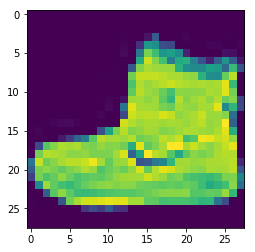

In [4]:
plt.imshow(X_train[0].reshape([28,28]))

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [5]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5786

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [11]:
num_components = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]
score_list = []
mean_score_list = []
var_score_list = []
num_iterations = 10

In [12]:
%%time
for num in num_components:  
    for _ in range(num_iterations):
        pca = PCA(n_components=num)
        used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr = LogisticRegression()
        lr.fit(X_train_lowdim, y_train[used_indices])
        lr.predict(pca.transform(X_test.reshape([-1, 784])))
        score_list.append(accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784])))))
    mean_score_list.append(np.mean(score_list))
    var_score_list.append(np.var(score_list))
    score_list = []

Wall time: 44min 32s


In [9]:
from matplotlib import pylab as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

## График зависимости функции качества от числа главных компонент

C:\Users\Igor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


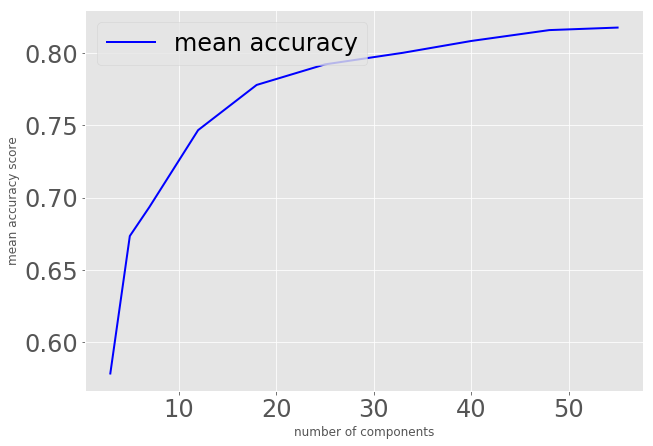

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.plot(num_components, mean_score_list, 'b', label='mean accuracy')
plt.xlabel('number of components')
plt.ylabel('mean accuracy score')
plt.legend(loc='upper left')

**Вывод:**
Оптимальным является количество главных компонент >=40

## График зависимости оценки дисперсии функции качества от числа главных компонент.

C:\Users\Igor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


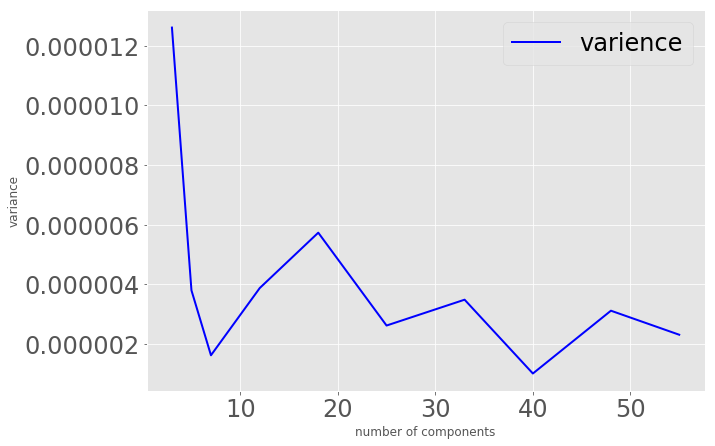

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.plot(num_components, var_score_list, 'b', label='varience')
plt.xlabel('number of components')
plt.ylabel('variance')
plt.legend(loc='upper right')

Из за того что дисперсия достаточно низкая при большом количестве главных компонент, новый график точности не должен сильно отличаться от предыдущего

# ДЗ 3

### Рассмотрим зависимость значения ошибки и ее стандартного отклонения от размера обучающей выборки

In [16]:
import sys

In [17]:
pca_components = 40
total_run = 4
accuracy_metric = []
variances = []
set_sizes = np.arange(500, 10500, 500)

In [18]:
for set_size in set_sizes:
    size_var = []
    #print (set_size)
    sys.stderr.write('i: %d /10500 \n' % (set_size))
    sys.stderr.flush()
    for i in range(total_run):
        pca = PCA(n_components=pca_components)
        used_indices = np.random.choice(np.arange(X_train.shape[0]), set_size, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr = LogisticRegression()
        #here we train our model
        lr.fit(X_train_lowdim, y_train[used_indices])
        y_pred = lr.predict(pca.transform(X_test.reshape([-1, 784])))
        #here we get our variance and accuracy
        score = accuracy_score(y_test, y_pred)
        size_var.append(score)
#add variance and accuracy to result array
    accuracy_metric.append(np.mean(size_var))
    variances.append(np.var(size_var))

i: 500 /10500 
i: 1000 /10500 
i: 1500 /10500 
i: 2000 /10500 
i: 2500 /10500 
i: 3000 /10500 
i: 3500 /10500 
i: 4000 /10500 
i: 4500 /10500 
i: 5000 /10500 
i: 5500 /10500 
i: 6000 /10500 
i: 6500 /10500 
i: 7000 /10500 
i: 7500 /10500 
i: 8000 /10500 
i: 8500 /10500 
i: 9000 /10500 
i: 9500 /10500 
i: 10000 /10500 


C:\Users\Igor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


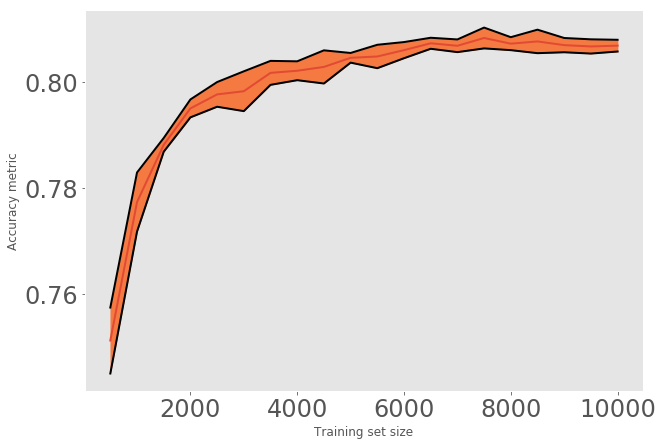

In [19]:
x = np.asarray(set_size)
accuracy_y = np.asarray(accuracy_metric)
variance_y = np.asarray(variances)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(set_sizes, accuracy_metric)
plt.plot(set_sizes, accuracy_y + np.sqrt(variance_y),color='#000000')
plt.plot(set_sizes, accuracy_y - np.sqrt(variance_y), color='#000000')
plt.fill_between(set_sizes, accuracy_y + np.sqrt(variance_y), accuracy_y - np.sqrt(variance_y), color='#f47a42')
plt.grid()
plt.xlabel("Training set size")
plt.ylabel("Accuracy metric")
plt.show()

**Вывод**¶

Для достижения приемлемой точности достаточно обучать классификатор на выборке размером 4000 объектов

### Теперь рассмотрим зависимость значения ошибки и ее стандартного отклонения от размера тестовой выборки

In [20]:
train_set_size = 4000
accuracy_metric = []
variances = []
set_sizes = np.arange(500, 10500, 500)

In [21]:
for set_size in set_sizes:
    size_var = []
    for i in range(total_run):
        sys.stderr.write('i: %d \n' % (i))
        sys.stderr.flush()
        pca = PCA(n_components=pca_components)
        used_indices = np.random.choice(np.arange(X_train.shape[0]), train_set_size, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr = LogisticRegression()
        #here we train our model
        lr.fit(X_train_lowdim, y_train[used_indices])
        #change size of test set
        used_indices = np.random.choice(np.arange(X_test.shape[0]), set_size, replace=False)
        y_pred = lr.predict(pca.transform(X_test[used_indices].reshape([-1, 784])))
        #here we get our variance and accuracy
        score = accuracy_score(y_test[used_indices], y_pred)
        size_var.append(score)
#add variance and accuracy to result array
    accuracy_metric.append(np.mean(size_var))
    variances.append(np.var(size_var))
    

i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 
i: 0 
i: 1 
i: 2 
i: 3 


C:\Users\Igor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


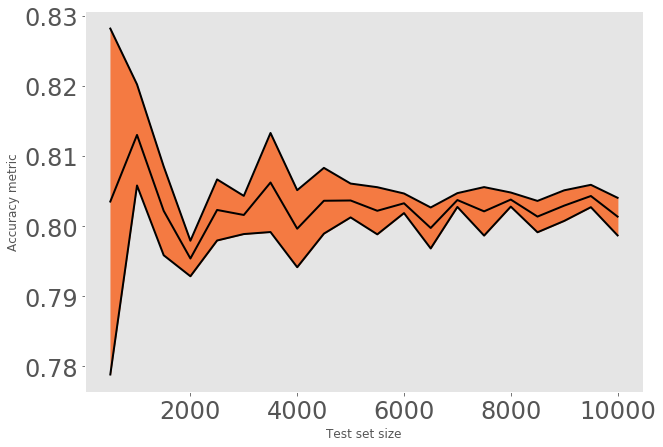

In [26]:
x = np.asarray(set_size)
accuracy_y = np.asarray(accuracy_metric)
variance_y = np.asarray(variances)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(set_sizes, accuracy_metric,  color='#000000')
plt.plot(set_sizes, accuracy_y + np.sqrt(variance_y),color='#000000')
plt.plot(set_sizes, accuracy_y - np.sqrt(variance_y), color='#000000')
plt.fill_between(set_sizes, accuracy_y + np.sqrt(variance_y), accuracy_y - np.sqrt(variance_y), color='#f47a42')
plt.grid()
plt.xlabel("Test set size")
plt.ylabel("Accuracy metric")
plt.show()

**Вывод:**
достаточно использовать размер тестовой выборки около 6000 объектов